In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.pyplot import plot, scatter, imshow, rcParams
import os, sys
import re
from io import StringIO
from glob import glob
import numpy as np, scipy as sp, pandas as pd
from scipy.integrate import cumtrapz
from scipy import signal
import csv, json
import editdistance as edist
from pandas.plotting import andrews_curves, parallel_coordinates, radviz

In [2]:
def euler(x):
    return np.exp(x * np.pi * 1j)

In [3]:
basedir = '/media/mike/tera/data/case/Nina_data/2017_Pressure Data'

In [4]:
fns = glob(basedir + '/*.PRS')
fns[:5]

['/media/mike/tera/data/case/Nina_data/2017_Pressure Data/Case_1133_.PRS',
 '/media/mike/tera/data/case/Nina_data/2017_Pressure Data/Case_1073_.PRS',
 '/media/mike/tera/data/case/Nina_data/2017_Pressure Data/Case_1061_.PRS',
 '/media/mike/tera/data/case/Nina_data/2017_Pressure Data/Case_1045_.PRS',
 '/media/mike/tera/data/case/Nina_data/2017_Pressure Data/Case_1105_.PRS']

In [5]:
pd.read_csv(fns[0], skiprows=8, delimiter='\t').head()

,Pressure Data
0,-95.215
1,-96.128
2,-96.413
3,-102.028
4,-96.239


In [6]:
pd.read_csv(fns[0], skiprows=8).head()

,Pressure Data
0,-95.215
1,-96.128
2,-96.413
3,-102.028
4,-96.239


In [7]:
with open(fns[0], 'r') as f:
    data = f.read()

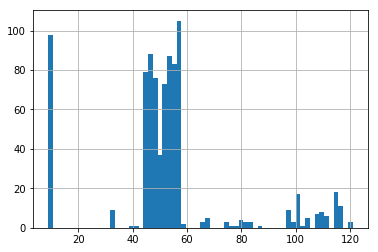

In [8]:
ser = pd.Series([ord(n) for n in data])
ser.hist(bins=64)

In [9]:
ser[ser == ord('\n')].head()

20     10
49     10
77     10
94     10
113    10
dtype: int64

In [10]:
with open(fns[0], 'r') as f: 
    dialect = csv.Sniffer().sniff(f.read(1024))

In [11]:
dialect

csv.Sniffer.sniff.<locals>.dialect

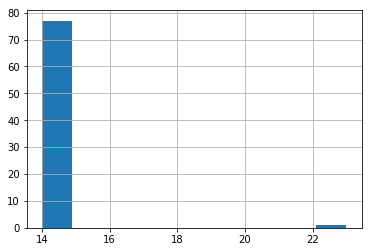

In [12]:
pd.Series([len(os.path.basename(fn)) for fn in fns]).hist()

#### Let's try to detect files of a certain naming pattern automatically

In [13]:
res = []
for n in fns:
    row = []
    for m in fns:
        row.append(edist.eval(m, n))
    res.append(row)

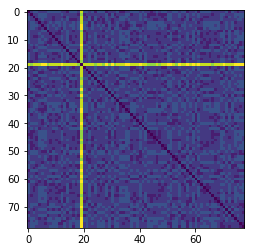

In [14]:
imshow(np.array(res))

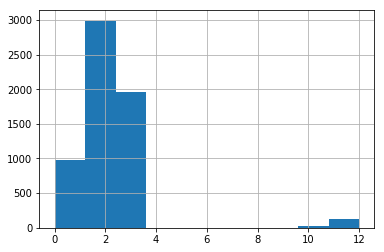

In [15]:
pd.Series(np.array(res).ravel()).hist()

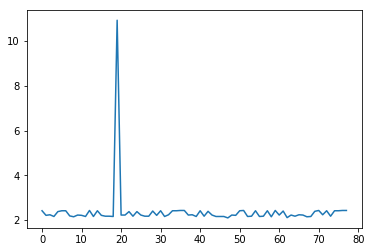

In [16]:
condensed = np.mean(res, axis=1)
plot(condensed)

In [17]:
print(pd.Series(fns)[condensed > 6].iloc[0])

/media/mike/tera/data/case/Nina_data/2017_Pressure Data/Case_1003_TESTLORES.PRS


In [18]:
vecs = [np.array(list(map(ord, os.path.basename(fn)))) for fn in fns]
vecs

[array([ 67,  97, 115, 101,  95,  49,  49,  51,  51,  95,  46,  80,  82,  83]),
 array([ 67,  97, 115, 101,  95,  49,  48,  55,  51,  95,  46,  80,  82,  83]),
 array([ 67,  97, 115, 101,  95,  49,  48,  54,  49,  95,  46,  80,  82,  83]),
 array([ 67,  97, 115, 101,  95,  49,  48,  52,  53,  95,  46,  80,  82,  83]),
 array([ 67,  97, 115, 101,  95,  49,  49,  48,  53,  95,  46,  80,  82,  83]),
 array([ 67,  97, 115, 101,  95,  49,  49,  53,  55,  95,  46,  80,  82,  83]),
 array([ 67,  97, 115, 101,  95,  49,  49,  49,  53,  95,  46,  80,  82,  83]),
 array([ 67,  97, 115, 101,  95,  49,  48,  48,  57,  95,  46,  80,  82,  83]),
 array([ 67,  97, 115, 101,  95,  49,  48,  49,  55,  95,  46,  80,  82,  83]),
 array([ 67,  97, 115, 101,  95,  49,  48,  54,  53,  95,  46,  80,  82,  83]),
 array([ 67,  97, 115, 101,  95,  49,  48,  57,  55,  95,  46,  80,  82,  83]),
 array([ 67,  97, 115, 101,  95,  49,  48,  49,  57,  95,  46,  80,  82,  83]),
 array([ 67,  97, 115, 101,  95,  49,  4

In [19]:
min([len(v) for v in vecs])

14

In [20]:
vecs = [v for v in vecs if len(v) < 15]

In [21]:
a = np.array(vecs)
a

array([[ 67,  97, 115, ...,  80,  82,  83],
       [ 67,  97, 115, ...,  80,  82,  83],
       [ 67,  97, 115, ...,  80,  82,  83],
       ..., 
       [ 67,  97, 115, ...,  80,  82,  83],
       [ 67,  97, 115, ...,  80,  82,  83],
       [ 67,  97, 115, ...,  80,  82,  83]])

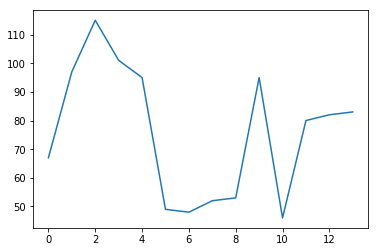

In [22]:
plot(np.median(a, axis=0))

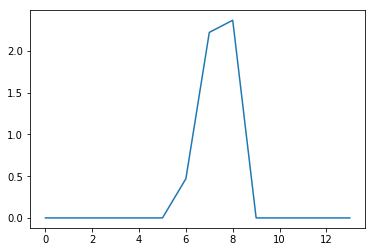

In [23]:
plot(pd.DataFrame(a).mad(axis=0))

In [24]:
mask = pd.DataFrame(a).mad(axis=0) < 0.1
len(mask)

14

In [25]:
sample = pd.Series(list(os.path.basename(fns[0])))
sample[mask]

0     C
1     a
2     s
3     e
4     _
5     1
9     _
10    .
11    P
12    R
13    S
dtype: object

In [26]:
sample[~mask] = r'.'

In [27]:
pat = r''.join(list(sample)) # .replace(r'\\\\', r"\\")
print(len(pat))
pat

14


'Case_1..._.PRS'

In [28]:
for fn in fns:
    print(re.findall(pat, fn))

['Case_1133_.PRS']
['Case_1073_.PRS']
['Case_1061_.PRS']
['Case_1045_.PRS']
['Case_1105_.PRS']
['Case_1157_.PRS']
['Case_1115_.PRS']
['Case_1009_.PRS']
['Case_1017_.PRS']
['Case_1065_.PRS']
['Case_1097_.PRS']
['Case_1019_.PRS']
['Case_1111_.PRS']
['Case_1031_.PRS']
['Case_1123_.PRS']
['Case_1095_.PRS']
['Case_1049_.PRS']
['Case_1055_.PRS']
['Case_1023_.PRS']
[]
['Case_1079_.PRS']
['Case_1067_.PRS']
['Case_1107_.PRS']
['Case_1041_.PRS']
['Case_1103_.PRS']
['Case_1085_.PRS']
['Case_1051_.PRS']
['Case_1005_.PRS']
['Case_1137_.PRS']
['Case_1093_.PRS']
['Case_1145_.PRS']
['Case_1053_.PRS']
['Case_1081_.PRS']
['Case_1153_.PRS']
['Case_1113_.PRS']
['Case_1155_.PRS']
['Case_1151_.PRS']
['Case_1077_.PRS']
['Case_1089_.PRS']
['Case_1057_.PRS']
['Case_1127_.PRS']
['Case_1059_.PRS']
['Case_1101_.PRS']
['Case_1063_.PRS']
['Case_1033_.PRS']
['Case_1043_.PRS']
['Case_1047_.PRS']
['Case_1013_.PRS']
['Case_1071_.PRS']
['Case_1075_.PRS']
['Case_1117_.PRS']
['Case_1129_.PRS']
['Case_1027_.PRS']
['Case_10

In [29]:
skip = 0
chunk = 10
next(pd.read_csv(fn, skiprows=skip, chunksize=chunk))

,1/20/2017 11:44:50 AM
0,Reynolds Number\t86034.161213
1,Current Q Pascals\t61.459292
2,Density\t1.210277
3,Temp(K)\t291.904439
4,Total Pressure\t101413.333846
5,Table Angle\t0.000000
6,Description\tC2_AR1_J1B\tJet Velocity\t0
7,Pressure Data
8,-107.722
9,-107.570


In [30]:
with open(fn, 'r') as f:
    data = [n.strip('\n') for n in f.readlines()]

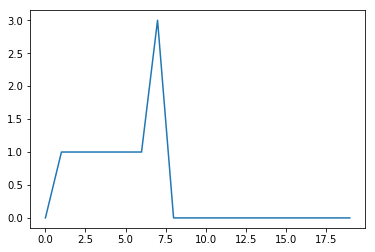

In [31]:
ser = [len(re.findall('\t', n)) for n in data[:20]]
plot(ser)

In [32]:
rcParams['figure.figsize'] = 4,4
for i in range(20):
#     plt.figure()
    line = [ord(c) for c in data[i]]
#     pd.Series(line).hist(bins=128)
    chrs = list(set(line))
    chrs.sort()
    print(chrs)
    

[32, 47, 48, 49, 50, 52, 53, 55, 58, 65, 77]
[9, 32, 46, 48, 49, 50, 51, 52, 54, 56, 78, 82, 98, 100, 101, 108, 109, 110, 111, 114, 115, 117, 121]
[9, 32, 46, 49, 50, 52, 53, 54, 57, 67, 80, 81, 97, 99, 101, 108, 110, 114, 115, 116, 117]
[9, 46, 48, 49, 50, 55, 68, 101, 105, 110, 115, 116, 121]
[9, 40, 41, 46, 48, 49, 50, 51, 52, 57, 75, 84, 101, 109, 112]
[9, 32, 46, 48, 49, 51, 52, 54, 56, 80, 84, 97, 101, 108, 111, 114, 115, 116, 117]
[9, 32, 46, 48, 65, 84, 97, 98, 101, 103, 108, 110]
[9, 32, 48, 49, 50, 65, 66, 67, 68, 74, 82, 86, 95, 99, 101, 105, 108, 110, 111, 112, 114, 115, 116, 121]
[32, 68, 80, 97, 101, 114, 115, 116, 117]
[45, 46, 48, 49, 50, 55]
[45, 46, 48, 49, 53, 55]
[45, 46, 48, 49, 53, 54, 55]
[45, 46, 49, 50, 51, 54, 57]
[45, 46, 48, 49, 50, 54, 55, 57]
[45, 46, 48, 49, 53, 54, 55]
[45, 46, 48, 49, 50, 54]
[45, 46, 48, 49, 54, 55]
[45, 46, 48, 49, 53, 54, 56, 57]
[45, 46, 48, 49, 50, 51, 54]
[45, 46, 48, 49, 53, 57]


In [33]:
digits = {ord(str(i)): 48 for i in range(10)}
digits

{48: 48,
 49: 48,
 50: 48,
 51: 48,
 52: 48,
 53: 48,
 54: 48,
 55: 48,
 56: 48,
 57: 48}

In [34]:
line = data[-1]
re.sub('\d', '0', line)

'-0.000'

In [35]:
def generify(line):
    line = re.sub('[a-z]', 'a', line)
    line = re.sub('[A-Z]', 'A', line)
    line = re.sub('\d', '0', line)
    return line 

line = data[2]

generify(line)

'Aaaaaaa A Aaaaaaa\t00.000000'

In [36]:
def vectify(line):
    """Map down printable characters into a vector space"""
    # *=42 43=+ ,=44 -=45 .=46 /=47 0=48
    # leave 32-47, map down all nums to 0, caps to 1, lowers to 2
    line = re.sub('\n', '\x1e', line)
    line = re.sub('\t', '\x1f', line)
#     line = re.sub('[!#&]', '*', line)
    line = re.sub('\d', '0', line)
    line = re.sub('[A-Za-z]', '1', line)
    line = re.sub('_', '2', line)
    line = re.sub('\:', '3', line)
    line = re.sub('\;', '4', line)
    line = re.sub('\<', '5', line)
    line = re.sub('\=', '6', line)
    line = re.sub('\>', '5', line)
    line = re.sub('\?', '7', line)
    line = re.sub('\@', '8', line)
    line = re.sub(r'\\', '9', line)
#     line = re.sub(r'_', '\:', line)
    
    
    return line 

vectify(data[0])

'0/00/0000 00300300 11'

In [37]:
a = 'abc\\def'
print(len(a))
vectify(a)

7


'1119111'

In [38]:
ord('/')

47

In [39]:
xset = set()
for i in range(20):
#     plt.figure()
    line = data[i]
    line = vectify(line)
    line = [ord(c)-30 for c in line]
#     pd.Series(line).hist(bins=128)
    chrs = list(set(line))
    chrs.sort()
    print(data[i])
    print(chrs)
    xset.update(set(chrs))
    
chrs = list(xset)
print(chrs)

1/20/2017 11:44:50 AM
[2, 17, 18, 19, 21]
Reynolds Number	86034.161213
[1, 2, 16, 18, 19]
Current Q Pascals	61.459292
[1, 2, 16, 18, 19]
Density	1.210277
[1, 16, 18, 19]
Temp(K)	291.904439
[1, 10, 11, 16, 18, 19]
Total Pressure	101413.333846
[1, 2, 16, 18, 19]
Table Angle	0.000000
[1, 2, 16, 18, 19]
Description	C2_AR1_J1B	Jet Velocity	0
[1, 2, 18, 19, 20]
Pressure Data
[2, 19]
-107.722
[15, 16, 18]
-107.570
[15, 16, 18]
-107.516
[15, 16, 18]
-112.639
[15, 16, 18]
-107.629
[15, 16, 18]
-106.715
[15, 16, 18]
-106.226
[15, 16, 18]
-106.760
[15, 16, 18]
-109.865
[15, 16, 18]
-110.236
[15, 16, 18]
-110.195
[15, 16, 18]
[1, 2, 10, 11, 15, 16, 17, 18, 19, 20, 21]


In [40]:
[(i, chr(i)) for i in range(45, 50)]

[(45, '-'), (46, '.'), (47, '/'), (48, '0'), (49, '1')]

In [41]:
ord('9')-30

27

In [42]:
a = np.zeros(28)
a[chrs] = 1
a

array([ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
        0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.])

In [43]:
def text_remap(line):
    """Map down printable characters into a vector space"""
    # leave 32-47, map down all nums to 0, caps to 1, lowers to 2
    line = re.sub('\t', '\x1f', line)
    line = re.sub('\d', '0', line)
    line = re.sub('[A-Za-z]', '1', line)
    line = re.sub('_', '2', line)
    line = re.sub('\:', '3', line)
    line = re.sub('\;', '4', line)
    line = re.sub('[\<\>\[\]]', '5', line)
    line = re.sub('\=', '6', line)
    line = re.sub('\?', '7', line)
    line = re.sub('\@', '8', line)
    line = re.sub(r'\\', '9', line)
    
    
    return line

def vectorize_line(line):    
    line = list(set(line))
    line = [ord(c)-30 for c in line]
    vec = np.zeros(28)
    vec[line] = 1
    return vec

def one_hotify(line):
    """Convert a line of text to a one-hot using the remap converter thing"""
    return vectorize_line(text_remap(t))
    
t = '1/20/2017 11:44:50 AM'
vectorize_line(text_remap(t))

array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.])

In [44]:
def vectorize_text(doc, linedelim='\n'):
    """Map each line of a document into a vector space"""
    data = text_remap(doc)
    data = data.split(linedelim)
    data = [vectorize_line(line) for line in data]
    return np.array(data)
    
    

In [45]:
with open(fns[0], 'r') as f:
    data = f.read()
data = text_remap(data).split('\n')
data[:10]

['0/00/0000 0300300 11',
 '11111111 111111\x1f00000.000000',
 '1111111 1 1111111\x1f00.000000',
 '1111111\x1f0.000000',
 '1111(1)\x1f000.000000',
 '11111 11111111\x1f000000.000000',
 '11111 11111\x1f0.000000',
 '11111111111\x1f111111111011010\x1f111 11111111\x1f0',
 '11111111 1111',
 '-00.000']

In [46]:
with open(fns[0], 'r') as f:
    data = f.read()
    
data = vectorize_text(data)

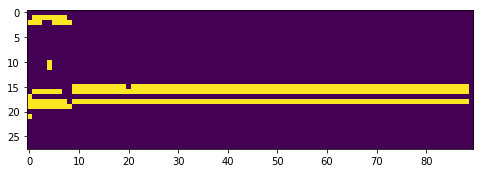

In [47]:
rcParams['figure.figsize'] = 8,4
imshow(data.T)

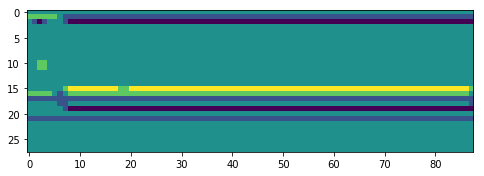

In [48]:
imshow(cumtrapz(np.diff(data, axis=0), axis=0).T)

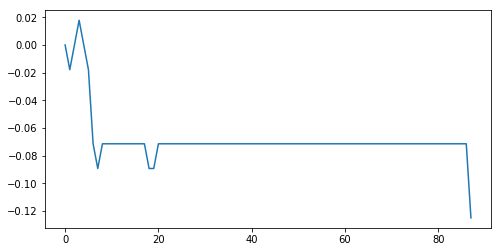

In [49]:
x = np.mean(cumtrapz(np.diff(data, axis=0), axis=0), axis=1)
plot(x)

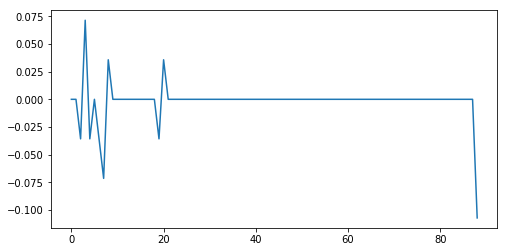

In [50]:
x = np.mean(np.diff(data, axis=0), axis=1)
plot(x)

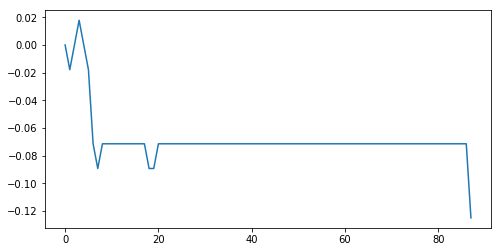

In [51]:
plot(cumtrapz(x))

In [52]:
with open('/home/mike/data/webcsv/gothmusic2016.csv', 'r') as f:
    djdata = f.read()
    
with open('/home/mike/data/webcsv/gothmusic2016.csv', 'r') as f:
    djlines = f.readlines()[:-1]
    
    
djdata = vectorize_text(djdata)[:-1]
data = djdata

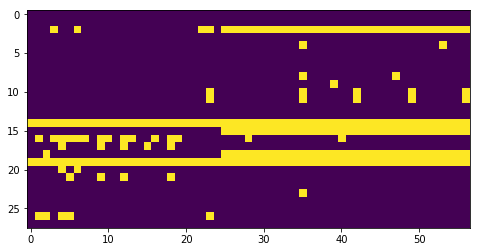

In [53]:
imshow(data.T)

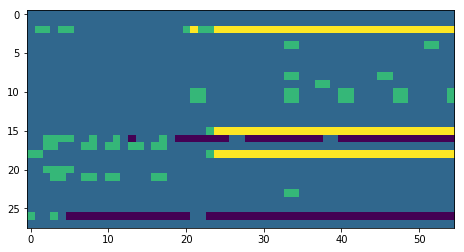

In [54]:
imshow(cumtrapz(np.diff(data, axis=0), axis=0).T)

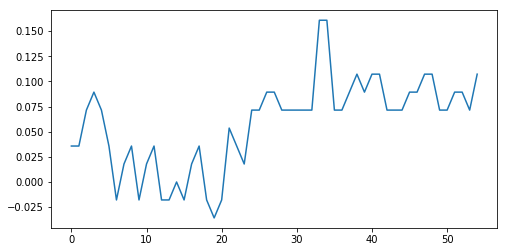

In [55]:
plot(np.mean(cumtrapz(np.diff(data, axis=0), axis=0), axis=1))

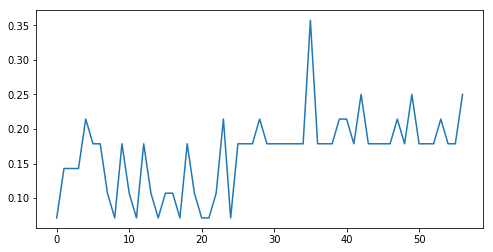

In [56]:
plot(np.mean(data, axis=1))

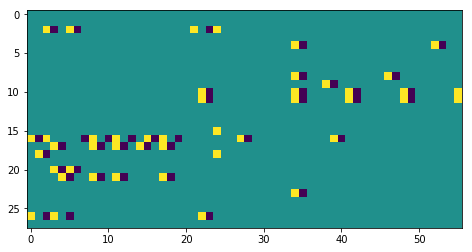

In [57]:
imshow(np.diff(data, axis=0).T)

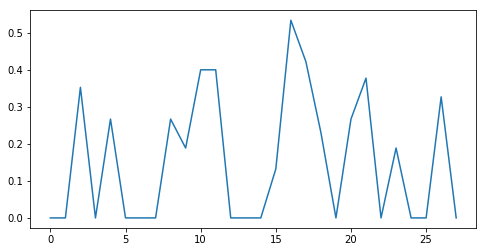

In [58]:
dt = np.diff(data, axis=0)
plot(np.std(dt, axis=0).reshape(-1,1))

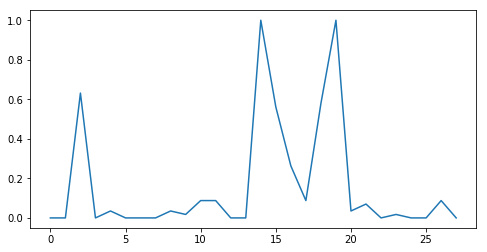

In [59]:
plot(np.mean(data, axis=0))

In [60]:
mu = np.mean(data, axis=0)
mask =  np.greater(mu, 0) * np.less(mu, 1)
# mask = mask.reshape(1,-1)
print(mask.shape)
print(data.shape)
mask

(28,)
(57, 28)


array([False, False,  True, False,  True, False, False, False,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
        True, False,  True,  True, False,  True, False, False,  True, False], dtype=bool)

(57, 14)


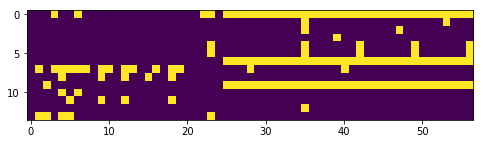

In [61]:
d2 = data.T[mask].T # probably masking this wrong, oh well
print(d2.shape)
imshow(d2.T)

now we have only the vector space which isn't static

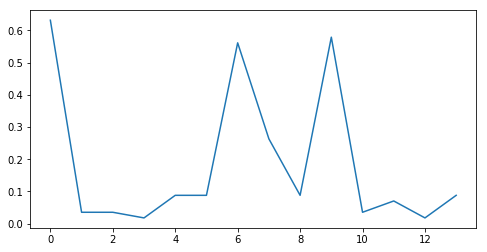

In [62]:
plot(np.mean(d2, axis=0))

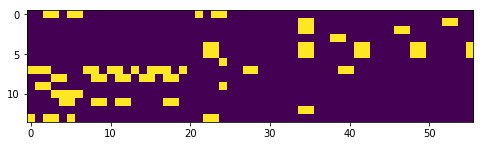

In [63]:
imshow(np.diff(d2, axis=0).T**2)

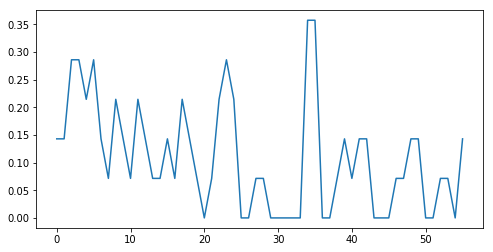

In [64]:
plot(np.mean(np.diff(d2, axis=0)**2, axis=1))

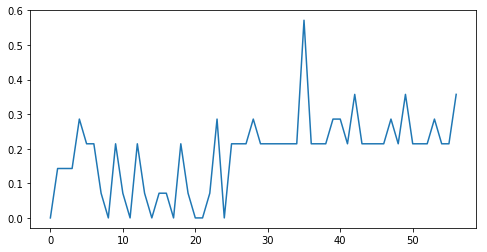

In [65]:
plot(np.mean(d2, axis=1))

In [66]:
def fread(fn):
    with open(fn, 'r') as f:
        data = f.read()
    return data

In [67]:
vectorize_text(fread(fns[0]))

array([[ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [68]:
arys = []
for fn in fns:
    arys.append(vectorize_text(fread(fn)))

In [69]:
len(fns)

78

In [70]:
a = np.array(arys)
a.shape

(78, 90, 28)

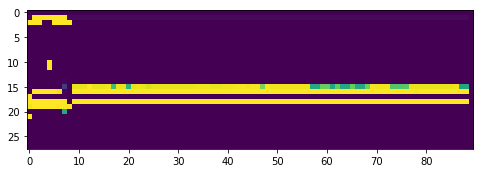

In [71]:
imshow(np.mean(a, axis=0).T)

In [72]:
head = { 'name': 'foobaz', 'cols': {'foo': 0, 'bar': 1, 'baz': {'yo': 'dawg', 'i':{'heard':'you', 'like': 'recursion', 'yo':'yo', 'what': 'up'}}}}

In [73]:
s1 = json.dumps(head)
s1 = re.sub('\{', '{\n', s1)
s1 = re.sub('\},', '},\n', s1)
s1 = re.sub('\}', '\n}', s1)

print(s1)

{
"name": "foobaz", "cols": {
"baz": {
"i": {
"heard": "you", "what": "up", "yo": "yo", "like": "recursion"
},
 "yo": "dawg"
},
 "bar": 1, "foo": 0
}
}


In [74]:
df = pd.read_csv('/home/mike/py/rando/music/2016.csv', index_col=None)
df.head()

,a,b,dj,event,raw,req,artist
0,∆Aimon,Amen,dj zilchhound,2016-12-02 Cold Dark Matter,∆Aimon - Amen,0.0,∆aimon
1,Banks,Waiting Game,dj zilchhound,2016-12-02 Cold Dark Matter,Banks - Waiting Game,0.0,banks
2,Salem,Frost,dj zilchhound,2016-12-02 Cold Dark Matter,Salem - Frost,0.0,salem
3,Pictureplane,Goth Star,dj zilchhound,2016-12-02 Cold Dark Matter,Pictureplane - Goth Star,0.0,pictureplane
4,IAMTHEKID...,Run,dj zilchhound,2016-12-02 Cold Dark Matter,IAMTHEKID... - Run,0.0,iamthekid


In [75]:
body = StringIO()
df.head(40).to_csv(body, index=None)

In [76]:
temp = StringIO(s1 + '\n@fin\n' +  body.getvalue())

In [77]:
with open('test_out.csv', 'w') as f:
    f.write(temp.getvalue())

In [78]:
# pd.read_csv(temp)

In [79]:
d = eval(s1.replace('\n', ''))
type(d)

dict

In [80]:
d['cols']['baz']

{'i': {'heard': 'you', 'like': 'recursion', 'what': 'up', 'yo': 'yo'},
 'yo': 'dawg'}

In [81]:
with open('test_out_derp.csv', 'r') as derp:
    doh = derp.read()

dumb = doh.split('@fin')[0]
print(dumb)
while True:
#     test = re.findall(',,', dumb)
    pass
    if True:
        break
    
dumb = re.sub(',+', ',', dumb)
print(dumb)
# herp = json.loads(dumb)

{,,,,,,
cols: {,,,,,,
baz: {,,,,,,
i: {,,,,,,
heard: "you", "yo": "yo", "like": "recursion", "what": "up",,,
},,,,,,
 "yo": "dawg",,,,,,
},,,,,,
 "bar": 1, "foo": 0,,,,,
},,,,,,
 "name": "foobaz",,,,,,
},,,,,,

{,
cols: {,
baz: {,
i: {,
heard: "you", "yo": "yo", "like": "recursion", "what": "up",
},
 "yo": "dawg",
},
 "bar": 1, "foo": 0,
},
 "name": "foobaz",
},



In [82]:
id(df.index)

140175283687608

In [83]:
id(df['artist'].index)

140175283687608

In [84]:
ser = df['artist']

In [85]:
len(vecs), vecs[0].shape

(77, (14,))

In [86]:
ary = np.array(vecs)
ary.shape

(77, 14)

In [87]:
print(vecs[0])

[ 67  97 115 101  95  49  49  51  51  95  46  80  82  83]


Ok, bit of a wacky idea. What if we had a fixed-size space of N length one-hot encoding, and T length arbitrary strings. We want to downmap into say 8 dim rotational space, so we create a complex for each "slice of the pie". Multiply that against your "unitrotator" and collapse along the T dim. You now are embedded in N-dim space. 

In [88]:
x = np.arange(0, 1, 0.125, dtype=float)

y = euler(x)
for i in range(len(x)):
    print(8*x[i], y[i])

0.0 (1+0j)
1.0 (0.923879532511+0.382683432365j)
2.0 (0.707106781187+0.707106781187j)
3.0 (0.382683432365+0.923879532511j)
4.0 (6.12323399574e-17+1j)
5.0 (-0.382683432365+0.923879532511j)
6.0 (-0.707106781187+0.707106781187j)
7.0 (-0.923879532511+0.382683432365j)


In [89]:
for i, v in enumerate(vecs[0]):
    print(i, v*y[i & 7] / 100)

0 (0.67+0j)
1 (0.896163146536+0.371202929394j)
2 (0.813172798365+0.813172798365j)
3 (0.386510266689+0.933118327836j)
4 (5.81707229595e-17+0.95j)
5 (-0.187514881859+0.452700970931j)
6 (-0.346482322781+0.346482322781j)
7 (-0.471178561581+0.195168550506j)
8 (0.51+0j)
9 (0.877685555886+0.363549260747j)
10 (0.325269119346+0.325269119346j)
11 (0.306146745892+0.739103626009j)
12 (5.0210518765e-17+0.82j)
13 (-0.317627248863+0.766820011984j)


In [90]:
vectify(os.path.basename(fns[0]))

'1111200002.111'

In [91]:
fn = os.path.basename(fns[0])
text_remap(fn)

'1111200002.111'

In [92]:
one_hotify(fn)

array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.])

In [93]:
zs = []
for i, v in enumerate(text_remap(fn)):
#     print(i, v, ord(v), vectorize_line(v))# v*y[i & 7] / 100)
    a = np.array(vectorize_line(v))
    q = y[i & 7]
    z = euler(q) * a
    zs.append(z)
zs = np.array(zs)
zs.shape

(14, 28)

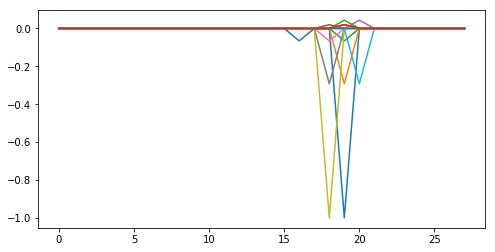

In [94]:
plot(np.real(zs.T))

In [95]:
flat_z = np.sum(zs, axis=0)
print(flat_z.shape)

(28,)


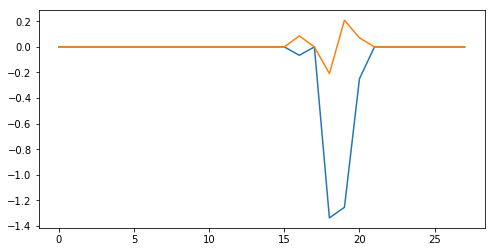

In [96]:
plot(np.real(flat_z))
plot(np.imag(flat_z))

In [97]:
def embed_cyl(line):
    zs = []
    for i, v in enumerate(text_remap(line)):
        a = np.array(vectorize_line(v))
        q = y[i & 7]
        z = euler(q) * a
        zs.append(z)
    zs = np.array(zs)
    return np.sum(zs, axis=0)

In [98]:
filenames_z = [embed_cyl(fn) for fn in fns]

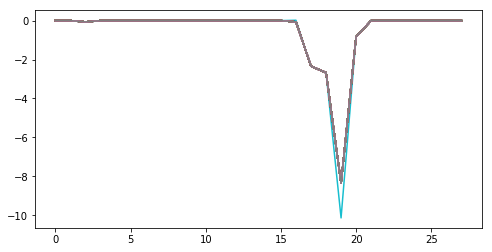

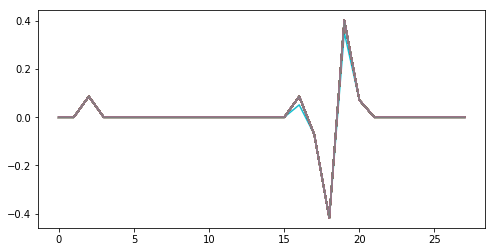

In [99]:
fig1 = plt.figure()
for zz in filenames_z:
    plot(np.real(zz))
    

fig2 = plt.figure()
for zz in filenames_z:
    plot(np.imag(zz))

In [100]:
with open(fns[0], 'r') as f:
    data = f.readlines()
    
data_z = [embed_cyl(fn) for fn in data]

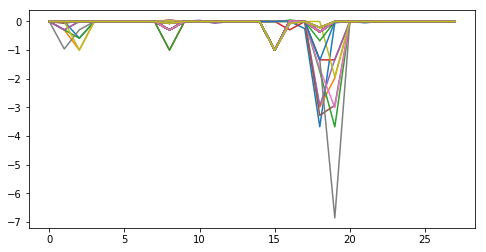

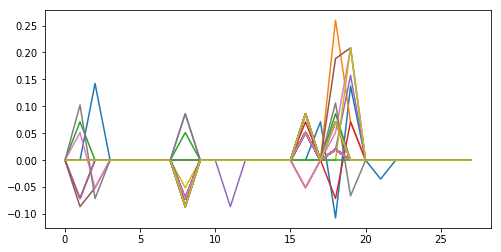

In [101]:
fig1 = plt.figure()
for zz in data_z:
    plot(np.real(zz))
    

fig2 = plt.figure()
for zz in data_z:
    plot(np.imag(zz))

# :D

now to do something something laplace space...

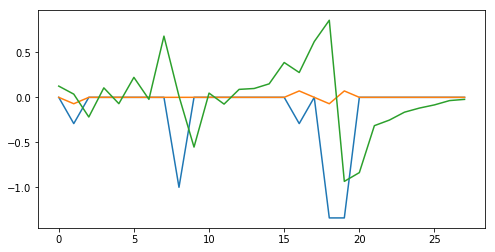

In [102]:
n = 3
plot(np.real(data_z[n]))
plot(np.imag(data_z[n]))
plot(np.imag(signal.hilbert(np.real(data_z[n]))))

''

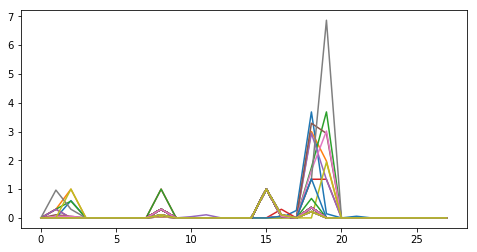

In [103]:
plot(np.abs(data_z).T)
''

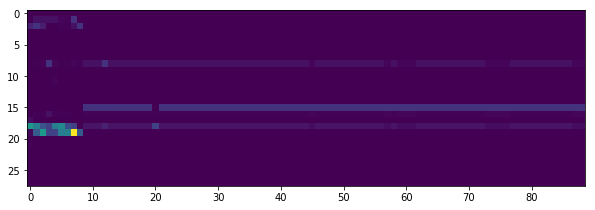

In [104]:
rcParams['figure.figsize'] = 10, 10
imshow(np.abs(data_z).T)

In [105]:
df = pd.DataFrame(np.abs(data_z))
df /= 10
df['name'] = 'body'
df.loc[:10, 'name'] = 'head'
df.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,name
0,0.0,0.000000,0.060104,0.0,0.0,0.0,0.0,0.0,0.004321,0.0,...,0.014496,0.0,0.005779,0.0,0.0,0.0,0.0,0.0,0.0,head
1,0.0,0.030052,0.100000,0.0,0.0,0.0,0.0,0.0,0.004321,0.0,...,0.197442,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,head
2,0.0,0.030052,0.058394,0.0,0.0,0.0,0.0,0.0,0.005489,0.0,...,0.368117,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,head
3,0.0,0.030052,0.000000,0.0,0.0,0.0,0.0,0.0,0.100000,0.0,...,0.134247,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,head
4,0.0,0.030052,0.000000,0.0,0.0,0.0,0.0,0.0,0.010845,0.0,...,0.132748,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,head


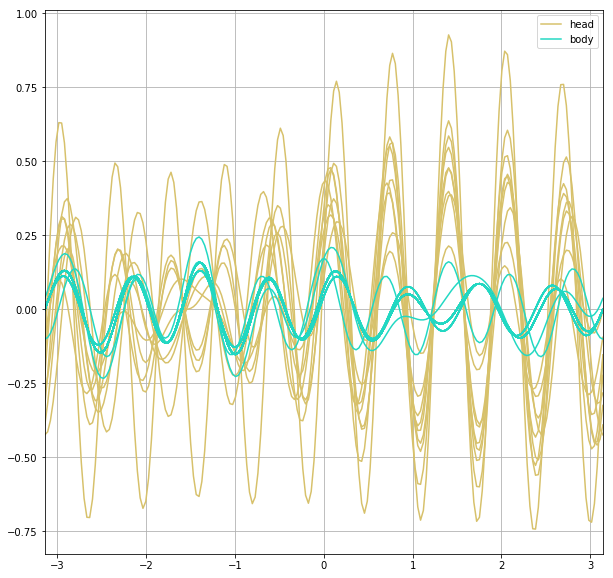

In [106]:
rcParams['figure.figsize'] = 10, 10

# radviz(df[[0, 1, 2, 3, 4, 5, 6, 7, 'name']], 'name')
andrews_curves(df, 'name')

In [107]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [108]:
scalar_ary = np.concatenate([np.real(data_z), np.imag(data_z)], axis=1)
x_embed = TSNE(n_components=2).fit_transform(scalar_ary)

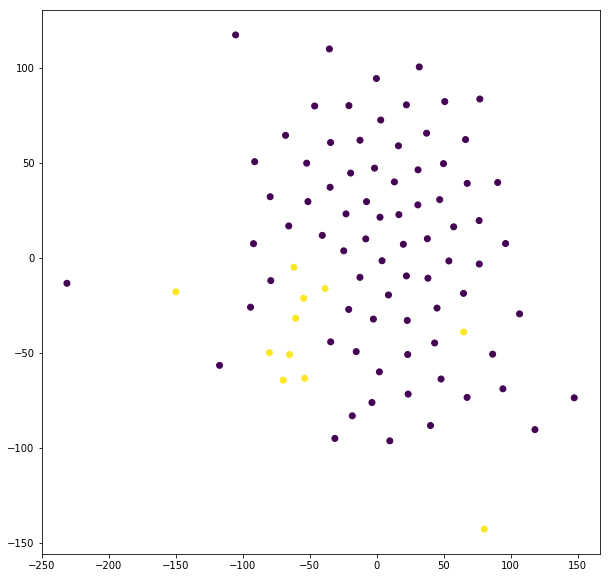

In [109]:
scatter(x_embed[:, 0], x_embed[:, 1], c=df['name'] == 'head')

In [110]:
x_embed = PCA(n_components=2).fit_transform(scalar_ary)

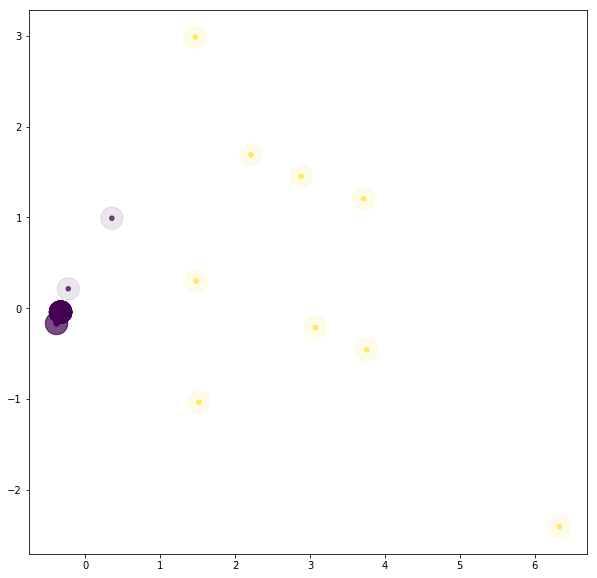

In [111]:
scatter(x_embed[:, 0], x_embed[:, 1], c=df['name'] == 'head', s=500, alpha=0.1)
scatter(x_embed[:, 0], x_embed[:, 1], c=df['name'] == 'head', s=20, alpha=0.7)

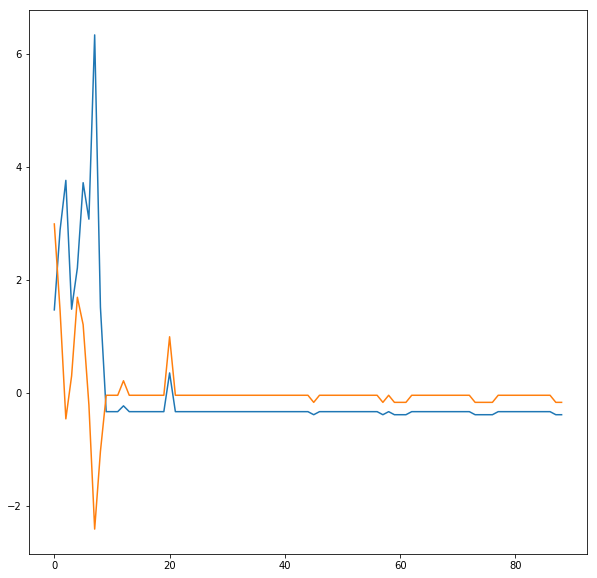

In [112]:
plot(x_embed)

In [113]:
djdata.shape

(57, 28)

In [114]:
dj_z = [embed_cyl(fn) for fn in djlines]

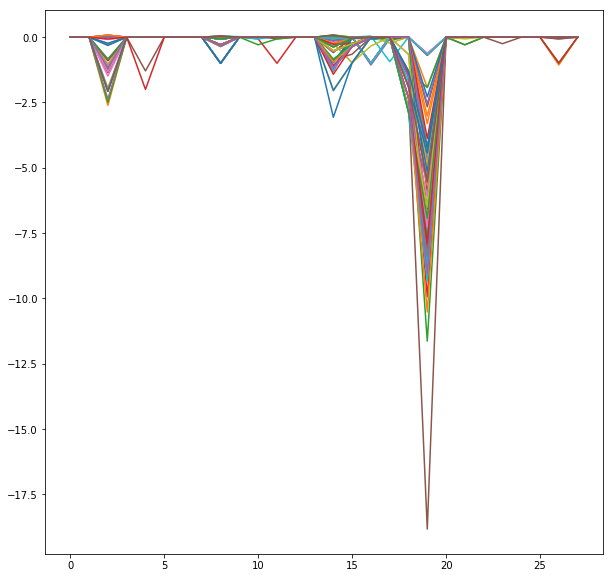

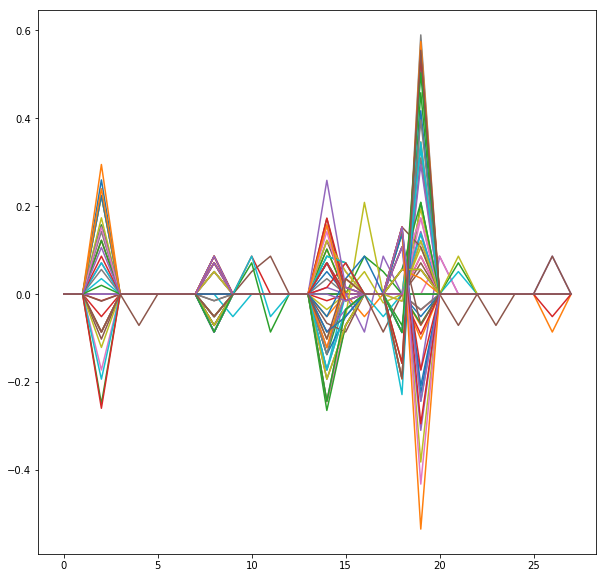

In [115]:
fig1 = plt.figure()
for zz in dj_z:
    plot(np.real(zz))
    

fig2 = plt.figure()
for zz in dj_z:
    plot(np.imag(zz))

In [116]:
scalar_ary = np.concatenate([np.real(dj_z), np.imag(dj_z)], axis=1)


In [117]:
x_embed = PCA(n_components=2).fit_transform(scalar_ary)

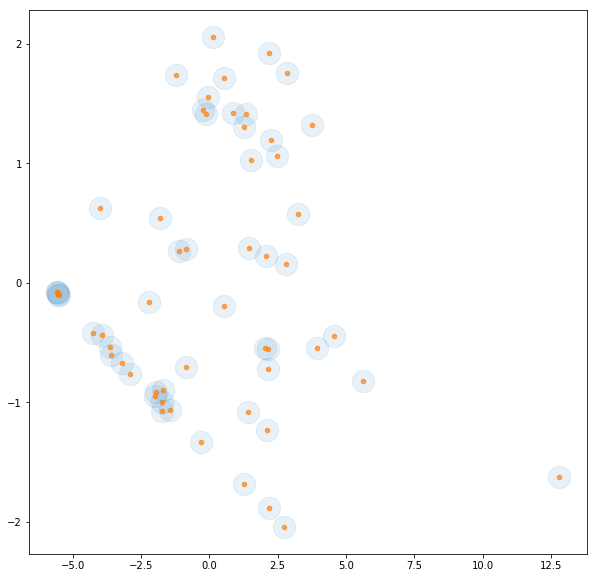

In [118]:
scatter(x_embed[:, 0], x_embed[:, 1], s=500, alpha=0.1)
scatter(x_embed[:, 0], x_embed[:, 1], s=20, alpha=0.7)

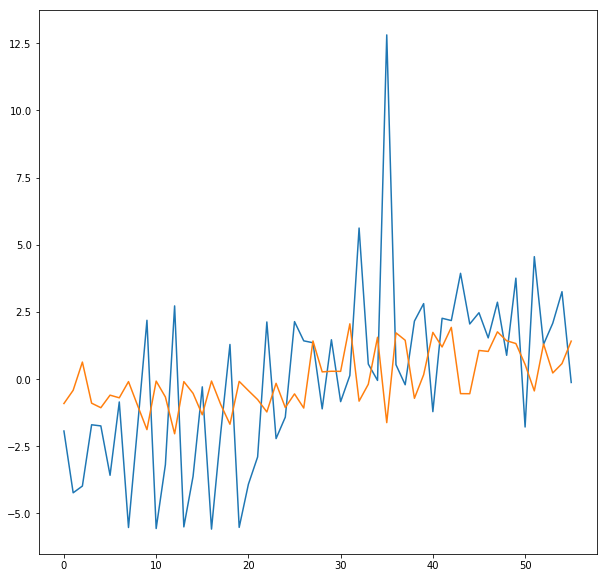

In [119]:
plot(x_embed)

The critical line for this dataset is around 25. You can kiiiinda see the edge here. But it's swamped by ~36. I dunno what that is. 

In [120]:
df = pd.DataFrame(scalar_ary)
df /= 10
df = df.clip(-1, 1)
df['name'] = 'body'
df.loc[:26, 'name'] = 'head'

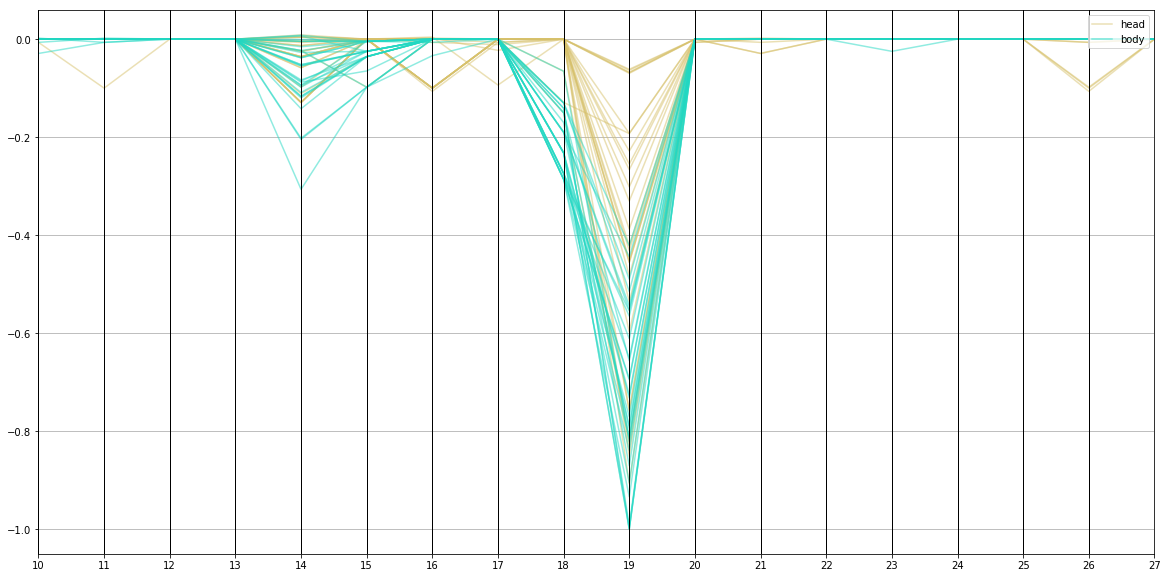

In [121]:
rcParams['figure.figsize'] = 20, 10

parallel_coordinates(df[list(range(10, 28)) + ['name']], 'name', alpha=0.5)

In [127]:
#%%html
# <iframe src="http://aeksco.github.io/magellan" width=1200 height=1200></iframe>